In [2]:
# manipulacion de datos panda
import pandas as pd

# Operaciones numericas
import numpy as np

# Creaciones de graficas
import matplotlib.pyplot as plt

# Trabajo con medicion de tiempo en procesos
from time import time

# Herramientas de SVM para separar datos de entrenamiento y pruebas
# libreria para Maquina Vectorial SVM
from sklearn.svm import SVC

#para separar datos de entrenamiento y pruebas
from sklearn.model_selection import train_test_split

#Medicion de precision --Eficiencia del algoritmo
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [3]:
#Leer el archivo set de datos y consultar informacion basica
digitos_df = pd.read_csv('digitos.csv')
digitos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [4]:
# Consultamos los primeros registros del set de datos
digitos_df.head()

#28 pixeles de altuta por 28 de alto

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# para ver la distribucion "Label" representa el velor del digitp
# que representa ejemplo 1,2,5 etc

# lo que podemos ver es que tenemos del
# numero "1" 4684 registros
# numero "7" 4401 registros

digitos_df['label'].value_counts()

,count
label,
1,4684
7,4401
3,4351
9,4188
2,4177
6,4137
0,4132
4,4072
8,4063


<Axes: >

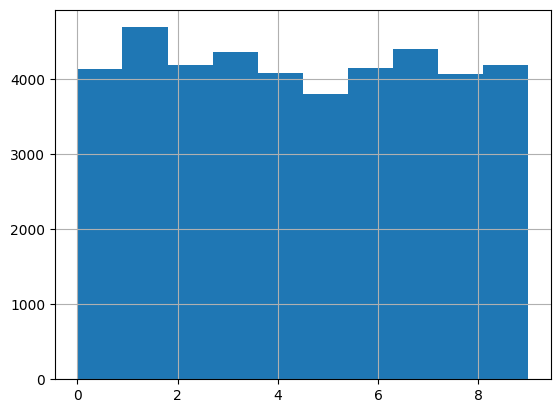

In [6]:
# aqui podemos ver un grafico que muestra mejor la informacion contenida
# donde el numero "1" es el valor con mas registros y el "5" el que menos
#registro tiene

digitos_df['label'].hist()

In [7]:
#obtener una seccion del dataframe usando los numero de columnas
pixeles = digitos_df.iloc[:,1:785] #X
digitos = digitos_df.iloc[:,0:1] # y

#separar los datos de prueba y entrenamiento

X_train, X_test, y_train, y_test = train_test_split(
    pixeles,
    digitos,
    test_size=0.50
)

# test_size -- representa el tamaño que dejaremos para hacer pruebas
# con el 25% de los datos

In [8]:
# consultamos informacion de la muestra de entrenamiento
X_train.shape

(21000, 784)

In [9]:
X_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
14219,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18518,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37708,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1258,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12294,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# mostramos un grafico que muestra un registro del set de datos.
#para ello, convertimos el array de 1 dimension en una matriz de 28x28

def mostrar_num(in_data):
    """mostramos un grafico que muestra un registro del set de datos.
    para ello, convertimos el array de 1 dimension en una matriz de 28x28
    """
    matriz = np.array(in_data.values)
    plt.imshow(matriz.reshape(28, 28))


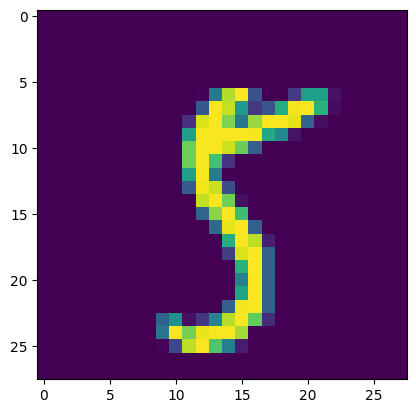

In [11]:
mostrar_num(X_test.iloc[100])

In [12]:
#Creacion del modelo
modelo = SVC(kernel='linear')

In [13]:
# Entrenamiento
#hora_inicio = time()
#modelo.fit(X_train.values, y_train.values.ravel())
#print('Entrenamiento terminado en {}'.format(time() - hora_inicio))

# Entrenamiento
hora_inicio = time()
modelo.fit(X_train.values, y_train.values.ravel())
print('Entrenamiento terminado en {}'.format(time() - hora_inicio))

Entrenamiento terminado en 50.226420402526855


In [14]:
# Crear predicción de datos
hora_inicio = time()
y_pred = modelo.predict(X_test.values)
print('Predicción terminada en {}'.format(time() - hora_inicio))
print(y_pred.shape)

Predicción terminada en 63.24917483329773
(21000,)


In [15]:
#la precision optenida es del 90%
precision = accuracy_score(y_test, y_pred)
print(f'Precisión: {precision}')

Precisión: 0.9094285714285715


El resultado era: label    5
Name: 28307, dtype: int64
El dígito que  maquina de predicion dice que es: [3]


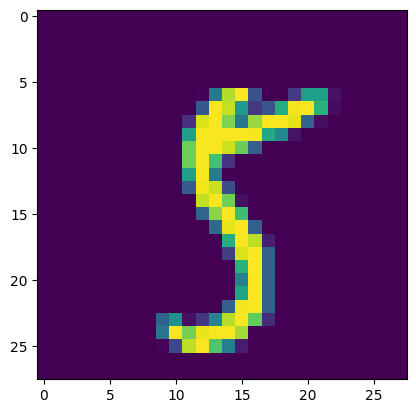

In [23]:
#realizamos prueba visual sobre la prediccion
prueba_manuales = 100 #Variable para cambio manual solo cmabiar el valor y realiza inspeccion visual de los resultados
prueba = X_test.iloc[prueba_manuales]
print(f'El resultado era: {y_test.iloc[prueba_manuales]}') #aqui podemos validar el resultado que era el real
mostrar_num(prueba)
prediccion = modelo.predict([prueba])
print(f'El dígito que  maquina de predicion dice que es: {prediccion}')  #aqui podemos ver el valor que la maquina dice que es

In [24]:
# Prueba con la matriz de confusión
# forma visual realizar inspeccion de errores
conf = confusion_matrix(y_test, y_pred)

In [25]:

conf

array([[1962,    0,    5,    3,    6,   15,   20,    1,    4,    2],
       [   0, 2318,    5,    5,    2,    1,    1,    7,   10,    1],
       [  19,   23, 1904,   40,   25,    2,   27,   26,   30,    5],
       [  11,   14,   61, 1962,    2,   62,    4,   14,   46,   15],
       [   0,    6,   34,    1, 1894,    1,   10,   17,    4,   82],
       [  22,   16,   16,  135,   16, 1607,   26,    2,   57,   12],
       [  10,    4,   23,    0,   18,   27, 1965,    0,    6,    0],
       [   3,   11,   31,    9,   20,    5,    0, 2011,    3,   97],
       [  22,   55,   43,  114,   13,   59,   18,   12, 1668,   20],
       [  13,   10,   11,   32,  117,   16,    0,   94,   15, 1807]])

In [27]:
def plot_cm(cm, classes):
    """Esta función se encarga de generar un gráfico con nuestra matriz de confusión.
    cm es la matriz generada por confusion_matrix
    classes es una lista que contiene las posibles clases que puede predecir nuestro modelo
    """
    plt.imshow(cm, cmap=plt.cm.Blues)
    plt.title('Matriz de confusión')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for indice_fila, fila in enumerate(cm):
        for indice_columna, columna in enumerate(fila):
            if cm[indice_fila, indice_columna] > thresh:
                color = "white"
            else:
                color = "black"
            plt.text(
                indice_columna,
                indice_fila,
                cm[indice_fila, indice_columna],
                color=color,
                horizontalalignment="center"
            )
    plt.ylabel("Valores reales")
    plt.xlabel("Valores calculados")
    plt.show()

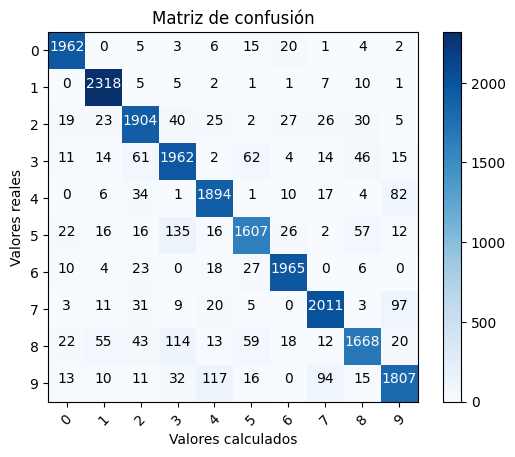

In [28]:
plot_cm(conf, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])